In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import nltk
import nltk as nk
from nltk import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.corpus import stopwords
import re


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier


# Accessing Files and Folders
# import os

# Data Collection and Preperation

In [ ]:
# json_data = open("data.json").read()
# data = json.loads(json_data)

# pd.read_json(open("data.json", "r", encoding="utf8"))
# basePath = os.path.dirname(os.path.abspath("data.json"))
# df = pd.read_json(basePath + "/data.json", orient = 'records', dtype={"A":str, "B":list})

data_df = pd.read_json('/home/airwolf/Data science Projects/Data Science Lab/data_15.json', lines=True)


In [4]:
data_115k = data_df
data_115k

,authors,doc_type,doi,fos,id,indexed_abstract,issue,n_citation,page_end,page_start,publisher,references,title,venue,volume,year
0,"[{'name': 'Jaewan Choi', 'id': '2345849543', '...",Conference,10.1109/IGARSS.2015.7326104,"[{'name': 'Algorithm design', 'w': 0.5023909},...",2081161232,"{'IndexLength': 102, 'InvertedIndex': {'We': [...",,1,1661,1658,IEEE,"[1998595580, 2031601791, 2125824214, 2132625770]",Hyperspectral change detection by using IR-MAD...,{'raw': 'international geoscience and remote s...,,2015
1,"[{'name': 'José Luis Javier Sánchez González',...",Conference,10.1002/int.v24:11,"[{'name': 'Artificial intelligence', 'w': 0.0}...",2081161242,"{'IndexLength': 172, 'InvertedIndex': {'An': [...",11,16,1173,1134,"John Wiley & Sons, Inc.","[1922030518, 2095224843, 2121657501, 212702527...",A cognitive map and fuzzy inference engine mod...,"{'raw': 'hybrid intelligent systems', 'id': '2...",24,2009
2,"[{'name': 'Saeed Ashrafinia', 'id': '65126738'...",Conference,10.1109/VETECF.2011.6093260,"[{'name': 'Power control', 'w': 0.48386094}, {...",2081161271,"{'IndexLength': 125, 'InvertedIndex': {'In': [...",,8,5,1,IEEE,"[1971554611, 2071707134, 2103366363, 211870239...",Source and Relay Power Selection Using Biogeog...,"{'raw': 'vehicular technology conference', 'id...",,2011
3,"[{'name': 'Konrad Tollmar', 'id': '2283826149'...",Conference,10.1145/572020.572027,"[{'name': 'Human–computer interaction', 'w': 0...",2081161416,"{'IndexLength': 167, 'InvertedIndex': {'In': [...",,80,50,41,ACM,"[177763134, 1515685044, 1995038424, 2017737164...",Understanding remote presence,{'raw': 'nordic conference on human-computer i...,,2002
4,"[{'name': 'He Zhao', 'id': '2244091333', 'org'...",Conference,10.1109/CyberC.2013.26,"[{'name': 'Real-time computing', 'w': 0.451335...",2081161507,"{'IndexLength': 114, 'InvertedIndex': {'It': [...",,1,116,109,IEEE,"[2023419890, 2024758283, 2046660101, 207310533...",Cost-Aware Automatic Virtual Machine Scaling i...,{'raw': 'cyber-enabled distributed computing a...,,2013
5,"[{'name': 'Alfred V. Aho', 'id': '2380581373',...",Journal,10.1109/TC.1968.227427,"[{'name': 'Computer science', 'w': 0.4339538},...",2081161582,"{'IndexLength': 53, 'InvertedIndex': {'Broadly...",6,0,606,606,IEEE,NaN,R68-27 Programming Languages for Automata,"{'raw': 'IEEE Transactions on Computers', 'id'...",17,1968
6,"[{'name': 'Mengqi Li', 'id': '2675473076', 'or...",Conference,10.1109/IEEM.2014.7058820,"[{'name': 'Systems design', 'w': 0.52365889999...",2081161794,"{'IndexLength': 135, 'InvertedIndex': {'System...",,0,1160,1156,IEEE,[],Reliable system design under uncertainty,{'raw': 'industrial engineering and engineerin...,,2014
7,"[{'name': 'Isabelle Devarenne', 'id': '1956482...",Conference,10.1109/ICTAI.2006.68,"[{'name': 'Machine learning', 'w': 0.455728531...",2081161806,"{'IndexLength': 82, 'InvertedIndex': {'Standar...",,10,150,144,IEEE,"[1582334898, 2093938881, 2104670598, 2167036627]",Intelligent Neighborhood Exploration in Local ...,{'raw': 'international conference on tools wit...,,2006
8,"[{'name': 'Giovanni Granato', 'id': '214897674...",Journal,10.1137/120874205,"[{'name': 'Bellman equation', 'w': 0.474811852...",2081161826,"{'IndexLength': 150, 'InvertedIndex': {'This':...",1,2,628,606,Society for Industrial and Applied Mathematics,"[1964345118, 1984394051, 2051653155]",Level-Set Approach for Reachability Analysis o...,{'raw': 'Siam Journal on Control and Optimizat...,52,2014
9,"[{'name': 'Kyungyong Lee', 'id': '2159270397',...",Conference,10.1109/CloudCom.2012.6427554,"[{'name': 'Scheduling (computing)', 'w': 0.500...",2081161958,"{'IndexLength': 121, 'InvertedIndex': {'MapRed...",,8,442,435,IEEE,"[1591141258, 2015377416, 2035795397, 205150534...",MapReduce on opportunistic resources leveragin...,{'raw': 'ieee international conference on clou...,,2012


## Data Exploration 

####  Which features are available in the dataset

In [12]:
print(data_115k.columns.values)

['authors' 'doc_type' 'doi' 'fos' 'id' 'indexed_abstract' 'issue'
 'n_citation' 'page_end' 'page_start' 'publisher' 'references' 'title'
 'venue' 'volume' 'year']


In [13]:
# preview the data
# data_115k.head()

In [ ]:
# preview the tail
data_115k.tail()


#### the distribution of numerical feature values across the samples

In [5]:
data_115k.describe()

,id,n_citation,year
count,1.119270e+05,111927.000000,111927.000000
mean,1.635868e+09,14.157174,2006.261277
std,6.329710e+08,81.030961,8.429047
min,1.899300e+04,0.000000,1946.000000
25%,1.851487e+09,1.000000,2001.000000
50%,1.896004e+09,3.000000,2008.000000
75%,1.940304e+09,11.000000,2013.000000
max,1.964865e+09,15863.000000,2019.000000


#### papers taken from year 25% are of 2002....... 50%=,  75%=.,........... max=....... min=..........

In [ ]:
data_115k.describe(include=np.object)

### for a data of data_20k
total venues 19403 and distinct venue are 3630

total reference are 12704 and distinct references are 11733

authors = 20000 and distinct 19903

distinct publishers = 687 and total = 20k

## Dealing with missing values
####  drop the rows where NaN values exist

In [15]:
data_115k.shape

(150794, 16)

In [78]:
### for searching for nan values all over the data
# data_115k.iloc[data_115k.loc[pd.isnull(data_115k).any(1), :].index.values]
# data.iloc[data.loc[pd.isnull(data).any(1), :].index.values]
# data_115k.ix[pd.isnull(data_115k).any(1).nonzero()[0].tolist()] 
# data_115k.loc[data_115k.isnull().any(1),:]

### a particular column
# data_115k[~data_115k["indexed_abstract"].isnull()] #only true values in a particular column
# data_115k[data_115k["indexed_abstract"].isnull()] #only nan values column



In [4]:
data_115k.dropna(axis=0,how="any",inplace=True)
# data = data.fillna('') # replace missing values with '' as in the previous lesson
data_115k

,authors,doc_type,doi,fos,id,indexed_abstract,issue,n_citation,page_end,page_start,publisher,references,title,venue,volume,year
0,"[{'name': 'FranÃ§ois Pinet', 'id': '2600797657...",Journal,10.4018/ijaeis.2014040101,"[{'name': 'Management science', 'w': 0.4590262...",2040665091,"{'IndexLength': 105, 'InvertedIndex': {'Inform...",2,0,18,1,IGI Global,"[5053679, 78586128, 139352171, 201032658, 2498...",Research in Agricultural and Environmental Inf...,{'raw': 'International Journal of Agricultural...,5,2014
1,"[{'name': 'Saleem N. Bhatti', 'id': '210565573...",Conference,10.1109/MILCOM.2011.6127596,"[{'name': 'Internet protocol suite', 'w': 0.49...",2040665207,"{'IndexLength': 150, 'InvertedIndex': {'For': ...",,7,1933,1926,IEEE,"[1913497436, 1927386222, 1986471453, 201850170...",Integrating challenged networks,"{'raw': 'military communications conference', ...",,2011
2,"[{'name': 'Qiyue Yu', 'id': '2319319007', 'org...",Journal,10.1587/transcom.E94.B.3251,"[{'name': 'Computer network', 'w': 0.452417099...",2040665296,"{'IndexLength': 186, 'InvertedIndex': {'SUMMAR...",12,0,3258,3251,"The Institute of Electronics, Information and ...","[1520197017, 1826091643, 1851758544, 200422526...",An Adaptive Weighted Clustering Algorithm for ...,{'raw': 'IEICE Transactions on Communications'...,94,2011
3,"[{'name': 'Brody Todd', 'id': '2171900038', 'o...",Journal,10.1155/2014/940130,"[{'name': 'Network simulation', 'w': 0.6640128...",2040665326,"{'IndexLength': 141, 'InvertedIndex': {'In': [...",,1,12,1,Hindawi,"[1511691436, 1516626342, 1547761211, 184561168...",Survivable Network Design and Optimization wit...,{'raw': 'Journal of Computer Networks and Comm...,2014,2014
4,"[{'name': 'Tadeusz Kaczorek', 'id': '256049494...",Journal,10.2478/amcs-2014-0054,"[{'name': 'Mathematical optimization', 'w': 0....",2040665619,"{'IndexLength': 72, 'InvertedIndex': {'Abstrac...",4,20,743,735,University of Zielona Gora Press,"[1573440194, 2139207988, 2151622640, 2484299525]",Minimum energy control of fractional descripto...,{'raw': 'International Journal of Applied Math...,24,2014
6,"[{'name': 'Marcel van Herk', 'id': '1924909209...",Journal,10.1016/0167-8655(92)90069-C,"[{'name': 'Recursion', 'w': 0.4664473999999999...",2040665675,"{'IndexLength': 43, 'InvertedIndex': {'Abstrac...",7,155,521,517,Elsevier Science Inc.,"[2069537876, 2154741421, 2157320119]",A fast algorithm for local minimum and maximum...,"{'raw': 'Pattern Recognition Letters', 'id': '...",13,1992
7,"[{'name': 'Jimmy Bahuleyan', 'id': '2513479055...",Conference,10.1109/IPDPSW.2010.5470906,"[{'name': 'Cluster analysis', 'w': 0.4330573},...",2040665680,"{'IndexLength': 86, 'InvertedIndex': {'The': [...",,0,8,1,IEEE,"[1527024979, 2001508659, 2002073007, 201829802...",Integrated energy-aware cyclic and acyclic sch...,{'raw': 'ieee international symposium on paral...,,2010
8,"[{'name': 'Mohamed Akil', 'id': '2297945666', ...",Journal,10.1007/s11554-006-0005-x,"[{'name': 'Bitstream format', 'w': 0.6556276},...",2040665822,"{'IndexLength': 215, 'InvertedIndex': {'In': [...",2,4,170,163,Springer-Verlag,"[2020600762, 2032149155]",FPGA-based architecture for hardware compressi...,{'raw': 'Journal of Real-time Image Processing...,1,2006
10,"[{'name': 'C. V. Pao', 'id': '2354283005'}, {'...",Journal,10.1137/S1064827502409912,"[{'name': 'Finite difference', 'w': 0.5497498}...",2040665934,"{'IndexLength': 217, 'InvertedIndex': {'This':...",1,19,185,164,Society for Industrial and Applied Mathematics,[],Block Monotone Iterations for Numerical Soluti...,{'raw': 'SIAM Journal on Scientific Computing'...,25,2003
11,"[{'name': 'Tahir Malas', 'id': '2101675203'}, ...",Journal,10.1137/060659107,"[{'name': 'Iterative method', 'w': 0.508972099...",2040665936,"{'IndexLength': 154, 'InvertedIndex': {'Iterat...",4,60,1494,1476,Society for Industrial and Applied Mathematics,"[1518815956, 1613455162, 2000971582, 204073394...",Incomplete LU Preconditioning with the Multile...,{'raw': 'SIAM Journal on Scientific Compu

#### Applying Basic statistics again after drop the null values

In [6]:
data_115k.describe()

,id,n_citation,year
count,5.615300e+04,56153.000000,56153.000000
mean,9.324050e+08,9.664185,2008.617474
std,6.357935e+08,43.328312,6.725932
min,1.091000e+03,0.000000,1946.000000
25%,1.315808e+08,1.000000,2005.000000
50%,1.414498e+09,3.000000,2011.000000
75%,1.484369e+09,8.000000,2014.000000
max,1.491294e+09,3115.000000,2019.000000


In [ ]:
data_115k.describe(include=np.object)

# Preprocessing 

## Data Cleaning, Grouping and Pruning

In [5]:
# get tokenized form of the abstract(tokenization at word level in a sentence) and the original abstract.
def Tokenized_and_OriginalAbstract(data):
    """
        Input data: String
        
        return: tokenized words at sentence level and other is a String 
    """
    x = lambda x:x["InvertedIndex"].keys()
    tokenized_abstract = [list(x(entry)) for entry in data] # tokeized form of the abstract content
    original_abstract = [" ".join(entry) for entry in tokenized_abstract]
    return (tokenized_abstract,original_abstract)


# get venues from the dataset
def Venues(data):
    """
        Input data: String
        
        return: venues as a string 
    """
    x = lambda x:x["raw"]
    return [x(entry) for entry in data_115k["venue"]]

# Authors and Field of Study(Keywords)
def Author_and_FOS_Values(data):
    """
        Input data: String
        
        return: authors and FOS as string 
    """
    filtered_data = []
    for entry in data:
        valueInEntry = []
        for value in entry:
            valueInEntry.append(value["name"])
#       filtered_data.append(valueInEntry)
        filtered_data.append(", ".join(valueInEntry))
    return filtered_data     

In [6]:
authors_115k = Author_and_FOS_Values(data_115k["authors"]) # get Author Names
keywords_115k = Author_and_FOS_Values(data_115k["fos"]) # get Field of Study 
abstract_115k = Tokenized_and_OriginalAbstract(data_115k["indexed_abstract"])
title_115k = data_115k["title"]
year_115k = data_115k["year"]
venue_115k = Venues(data_115k["venue"])

In [7]:
newData = pd.DataFrame(data=list(zip(authors_115k,keywords_115k,abstract_115k[1],title_115k,year_115k,venue_115k)),columns=["authors","fos","abstract","title","year","venue"])
newData.to_csv("filteredData_12.csv",index=False)


# Start from here if the data is normailized and saved to CSV file

## Basic Statistics on the subset of dataset that is normailzed

In [2]:
venueList = pd.read_csv("venueList_To_Extract.csv")
venues_To_Extract = ["".join(entry) for entry in venueList.values.tolist()] 

In [17]:
cummulative_data = pd.DataFrame()

In [29]:
data = pd.read_csv("CSV/filteredData_4.csv")
# np.sum(data.isnull(),axis=0) # whether all values are not a NaN
# data

In [30]:
all_data = pd.DataFrame()
for venue in venues_To_Extract:
    temp_df = data.iloc[data.index[data["venue"] == venue].tolist()].reset_index(drop=True)
    all_data = all_data.append(temp_df,ignore_index=True,sort=False)


In [31]:
cummulative_data = cummulative_data.append(all_data)

In [65]:
cummulative_data = cummulative_data.sample(frac=1).reset_index(drop=True)

In [66]:
cummulative_data

,authors,fos,abstract,title,year,venue
0,"Diego Martínez, Jean-Yves Lionel Lawson, José ...","Human–computer interaction, Multimedia, Comput...",Implementing appropriate interaction for Virtu...,A framework to develop VR interaction techniqu...,2011,international conference on human computer int...
1,"Tero Säntti, Jonne Poikonen, Olli Lahdenoja, M...","Smart camera, Image segmentation, Image proces...",This paper presents the implementation of opti...,Online seam tracking for laser welding with a ...,2015,international symposium on circuits and systems
2,"Chengchao Liang, F. Richard Yu","Wi-Fi array, Wireless WAN, Wireless network, R...",Wireless network virtualization and informatio...,Virtual resource allocation in information-cen...,2015,international conference on communications
3,"Harry Halpin, James Cheney","Data mining, RDF, World Wide Web, Semantics, N...",While the (Semantic) Web currently does have a...,Dynamic provenance for SPARQL updates using na...,2014,international world wide web conferences
4,"Xianke Dong, Pengfei Song, Xinyu Liu","Caenorhabditis elegans, Control engineering, N...",The tiny nematode worm Caenorhabditis elegans ...,An automated robotic system for high-speed mic...,2015,international conference on robotics and autom...
5,H. Chad Lane,"Multimedia, Intercultural competence, Human–co...","Metacognition, defined as active control over ...",Promoting Metacognition in Immersive Cultural ...,2009,international conference on human computer int...
6,"Yasser El-Sonbaty, Mohamed A. Ismail","Split graph, Pathwidth, Graph isomorphism, Gra...",In this paper a new distance for attributed re...,A New Error-Correcting Distance for Attributed...,2000,Lecture Notes in Computer Science
7,"Selwyn Piramuthu, Narayan Raman, Michael J. Shaw","Adaptive learning, Flow (psychology), Scheduli...",We study the problem of scheduling a Flexible ...,Decision support system for scheduling a Flexi...,1998,Annals of Operations Research
8,"Abdullah Alonazi, Yi Ma, Rahim Tafazolli","Computer network, Real-time computing, Calibra...",Fingerprint-based indoor positioning technique...,Less-calibration Wi-Fi-based indoor positioning,2015,international conference on communications
9,"Takayuki Warabino, Kenji Saito, Keizo Sugiyama...","Wireless ad hoc network, Computer network, Pee...",Vehicle-to-vehicle (peer-to-peer) communicatio...,Adaptive media switching for future vehicle-to...,2005,"personal, indoor and mobile radio communications"


In [32]:
cummulative_data

,authors,fos,abstract,title,year,venue
0,"Eun-Kyeong Kwon, Yong-Gu Cho, Kijoon Chae","Mobile database, Wireless Transport Layer Secu...",Mobile commerce is more than a mobile and wire...,Security Enhancement on Mobile Commerce,2001,Lecture Notes in Computer Science
1,"Anthony Brabazon, Michael O'Neill","Financial economics, Debt ratio, Evolutionary ...",This study examines the utility of Grammatical...,Bond-Issuer Credit Rating with Grammatical Evo...,2004,Lecture Notes in Computer Science
2,"Huijae Lee, Sang Bong Yoo","Metadata repository, Data element, RDF, Schema...","This paper presents extracting, storing, and a...",Dynamically Reconfiguring Sitemaps Using RDF,2004,Lecture Notes in Computer Science
3,"Christian Callegari, Stefano Giordano, Susanna...","Distributed computing, Mobile device, Computer...",A MANET (Mobile Ad-hoc NETwork) is a self-conf...,Design and Implementation of a Testbed for the...,2013,Lecture Notes in Computer Science
4,"Mohamed Ahmed Abdelraheem, Julia Borghoff, Eri...","Related-key attack, Differential cryptanalysis...","In recent years, light-weight cryptography has...",Cryptanalysis of the light-weight cipher a2u2,2011,Lecture Notes in Computer Science
5,Amin Vahdat,"Service-level agreement, Service quality, Comp...","Increasingly, critical compute services are be...",Dynamically provisioning distributed systems t...,2003,Lecture Notes in Computer Science
6,Anna E. Bobkowska,"Visual modeling, Use Case Diagram, Systems eng...",For the successful application of diagrams in ...,Selected Aspects of Customization of Cognitive...,2004,Lecture Notes in Computer Science
7,"Sondess Missaoui, Rim Faiz","Data mining, Mobile search, Usability, Machine...",Mobile search is a significant task in informa...,A New Preference Based Model for Relevant Dime...,2014,Lecture Notes in Computer Science
8,"Sanqiang Zhao, Sanqiang Zhao, Wen Gao, Shiguan...","Discrete mathematics, Active appearance model,...",Active Shape Model (ASM) is one of the most po...,Enhance the Alignment Accuracy of Active Shape...,2004,Lecture Notes in Computer Science
9,"Giuseppe Attardi, Stefano Dei Rossi, Maria Simi","Natural language processing, Parsing, Cluster ...",The Anaphora Resolution task of Evalita 2011 w...,UNIPI Participation in the Evalita 2011 Anapho...,2012,Lecture Notes in Computer Science


In [34]:
# check whether venues exit in that number or not
# all_data.iloc[all_data[all_data["venue"] == "international conference on parallel processing"].index.tolist()]

# # check whether the collection of the data from the dataset is right
# cummulative_data.groupby(by="venue").size().sort_values(ascending=False)

In [192]:
# check the original data as well for the papers published in a particualr venue
data.iloc[data.index[data["venue"] == "international conference on parallel processing"].tolist()].reset_index(drop=True)


,authors,fos,abstract,title,year,venue
0,Sascha Hunold,"Computer science, Distributed computing, Paral...",Due to the increasing number of cores current ...,Scheduling Moldable Tasks with Precedence Cons...,2013,international conference on parallel processing
1,"Pierre Riteau, Christine Morin, Thierry Priol","Computer science, Distributed computing, Hyper...",Live virtual machine migration is a powerful f...,Shrinker: improving live migration of virtual ...,2011,international conference on parallel processing
2,"Michael A. Laurenzano, Mitesh R. Meswani, Laur...","Distributed computing, Dynamic frequency scali...","Over the life of a modern supercomputer, energ...",Reducing energy usage with memory and computat...,2011,international conference on parallel processing
3,"Julien Frey, Robin Gras, Patricia Hernandez, R...","Evolutionary algorithm, Computer science, Gene...","Genetic Programming (GP), an evolutionary meth...",A Hierarchical Model of Parallel Genetic Progr...,2003,international conference on parallel processing
4,"Mark A. Oxley, Sudeep Pasricha, Howard Jay Sie...","Symmetric multiprocessor system, Computer scie...","In this paper, we study the problem of energy ...",Energy and Deadline Constrained Robust Stochas...,2013,international conference on parallel processing
5,"Deng Li, Liu Jie, Zhang Wenyong, Yuan Guoxing,...","Computer science, Parallel computing, Cost eff...",Parallel Monte Carlo methods are successful be...,The parallel computation of time-dependent Mon...,2003,international conference on parallel processing
6,"Samuel Neves, Filipe Araujo","Elliptic curve, Computer science, Distributed ...","In the era of multi and many-core processors, ...",Engineering Nonlinear Pseudorandom Number Gene...,2013,international conference on parallel processing
7,"Jens Lang, Gudula Rünger","Parallel computing, Profiling (computer progra...",In order to be able minimise the energy consum...,High-Resolution power profiling of GPU functio...,2013,international conference on parallel processing
8,"Martin Bečka, Gabriel Okša","Computer science, Parallel computing, Singular...",Parallel one-sided block-Jacobi algorithm for ...,Parallel One–Sided Jacobi SVD Algorithm with V...,2013,international conference on parallel processing
9,"Grzegorz Kozikowski, Bartłomiej Jacek Kubica","Automatic differentiation, Round-off error, Co...",This paper concerns a new approach to evaluati...,Parallel Approach to Monte Carlo Simulation fo...,2013,international conference on parallel processing


In [67]:
cummulative_data.iloc[cummulative_data.loc[pd.isnull(cummulative_data).any(1), :].index.values]


,authors,fos,abstract,title,year,venue


### distribution of data over the year.

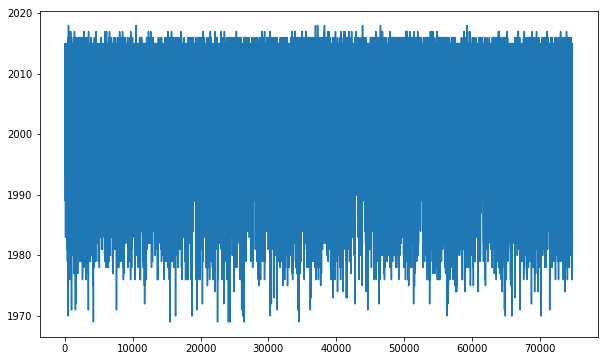

In [68]:
plt.figure(figsize=(10,6))
cummulative_data['year'].plot(linewidth=1.5);

(array([   47.,   250.,   656.,   586.,  1521.,  7385., 17419., 24654.,
        14171.,  8120.]),
 array([1969. , 1973.9, 1978.8, 1983.7, 1988.6, 1993.5, 1998.4, 2003.3,
        2008.2, 2013.1, 2018. ]),
 <a list of 10 Patch objects>)

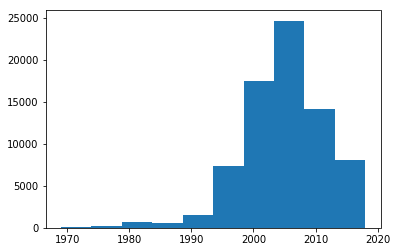

In [69]:
plt.hist(cummulative_data["year"]) # distribution of data over the year.

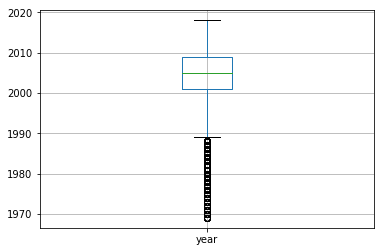

In [70]:
cummulative_data.boxplot()

In [38]:
cummulative_data.shape

(74809, 6)

####  As there are 56153 entries for research paper in total so we can see that number of unique authors are less which means some authors, fos, abstract and venues are repeated.

In [71]:
cummulative_data.nunique(axis=0)

authors     70431
fos         74786
abstract    74790
title       74807
year           50
venue          50
dtype: int64

In [72]:
cummulative_data[cummulative_data.duplicated(subset = "fos",keep=False)].sort_values("fos")

,authors,fos,abstract,title,year,venue
59547,"Alfredo Tirado-Ramos, Angela B. Shiflet","Applied mathematics, Higher education, Computa...",The Third Workshop on Teaching Computational S...,Third Workshop on Teaching Computational Scien...,2009,international conference on computational science
36938,"Alfredo Tirado-Ramos, Q. Luo","Applied mathematics, Higher education, Computa...",The Second Workshop on Teaching Computational ...,Second Workshop on Teaching Computational Scie...,2008,international conference on computational science
59211,"Thibault Luginbühl, Philippe Guerlain, André G...","Computer vision, Artificial intelligence, Comp...",Human body scanners can quickly provide clouds...,A Model-Based Approach for Human Body Reconstr...,2009,international conference on computer vision
26536,"Joan Martí, Pere Planiol, Jordi Freixenet, Jos...","Computer vision, Artificial intelligence, Comp...",This work presents an application intended to ...,Development of a Mammographic Analysis System ...,2001,Lecture Notes in Computer Science
1426,"Shengkui Gao, Suman Modal, Nan Zhu, Rongguang ...","Computer vision, Fluorescence-lifetime imaging...",This demonstration presents a compact and wear...,Live demonstration: A compact NIR fluorescence...,2015,international symposium on circuits and systems
55269,"Shengkui Gao, Suman Mondal, Nan Zhu, Rongguang...","Computer vision, Fluorescence-lifetime imaging...",Near infra-red (NIR) fluorescence imaging offe...,A compact NIR fluorescence imaging system with...,2015,international symposium on circuits and systems
61495,"Tran Khanh Dang, Roland Wagner, A Min Tjoa","Data mining, Computer science",Things have been changing increasingly since t...,A Quick Review: What Have Been Presented at DE...,2003,database and expert systems applications
29977,"Masami Maekawa, Toshiki Yamaoka","Data mining, Computer science",Even if the problems concerning HCI are indivi...,Use-state analysis to find domains to be re-de...,2011,international conference on universal access i...
6300,"Coral Calero, Cristina Cachero, Julio Córdoba,...","Data mining, Computer science",In this paper a comparative study carried out ...,PQM vs. BPQM: studying the tailoring of a gene...,2007,international conference on conceptual modeling
28671,"Stefan Rennick Egglestone, Brendan Walker, Joe...","Human–computer interaction, Computer science",Playful interaction in an important topic HCI ...,Analysing the playground: sensitizing concepts...,2011,international conference on human computer int...


In [179]:
venuesList = cummulative_data.groupby(by="venue").size().sort_values(ascending=False)[:50]
venuesList

venue
Lecture Notes in Computer Science                                                                  9926
international symposium on circuits and systems                                                    5395
international symposium on neural networks                                                         3325
international conference on acoustics, speech, and signal processing                               3290
international conference on computational science and its applications                             2501
international conference on computational science                                                  2492
international conference on communications                                                         2465
medical image computing and computer assisted intervention                                         2199
international conference on image processing                                                       2117
international conference on robotics and automation       

#### which year had which papers at which venues

In [73]:
cummulative_data.groupby(by=["year","venue"]).size()[::-1]

year  venue                                                                         
2018  soft computing                                                                      1
      international conference on intelligent computing                                   1
      Neurocomputing                                                                      1
      Applied Mathematics and Computation                                                 2
      Annals of Operations Research                                                       3
2017  soft computing                                                                     38
      international symposium on neural networks                                          1
      international conference on robotics and automation                                 1
      international conference on image processing                                        1
      ieee international conference on high performance computing data and analytics   

#### In a particular venue how many papers were published given an year

In [74]:
cummulative_data.groupby(by=["year","venue"]).size().sort_values(ascending=False)

year  venue                                                                                          
2004  Lecture Notes in Computer Science                                                                  1643
2015  international conference on communications                                                         1587
2003  Lecture Notes in Computer Science                                                                  1473
2005  Lecture Notes in Computer Science                                                                  1182
2015  international conference on acoustics, speech, and signal processing                               1083
2002  Lecture Notes in Computer Science                                                                  1022
2001  Lecture Notes in Computer Science                                                                   986
2015  international conference on robotics and automation                                                 885
2000  Lecture Note

In [180]:
def NumberOfPapersPublishedInVenue_or_FOS(fromTime, toTime):
    """
        Input fromTime and toTime: Number Int
        
        return: text string with its numberic count
    """
    time = cummulative_data["year"].apply(lambda x: x > fromTime and x < toTime )
    return cummulative_data["venue"][time].value_counts()[:30]

In [181]:
NumberOfPapersPublishedInVenue_or_FOS(2002,2008)

Lecture Notes in Computer Science                                                                  5068
international symposium on circuits and systems                                                    2068
international conference on computational science and its applications                             1717
international conference on computational science                                                  1686
international symposium on neural networks                                                         1524
personal, indoor and mobile radio communications                                                   1142
international conference on image processing                                                       1018
international conference on knowledge based and intelligent information and engineering systems     932
medical image computing and computer assisted intervention                                          842
international conference on intelligent computing               

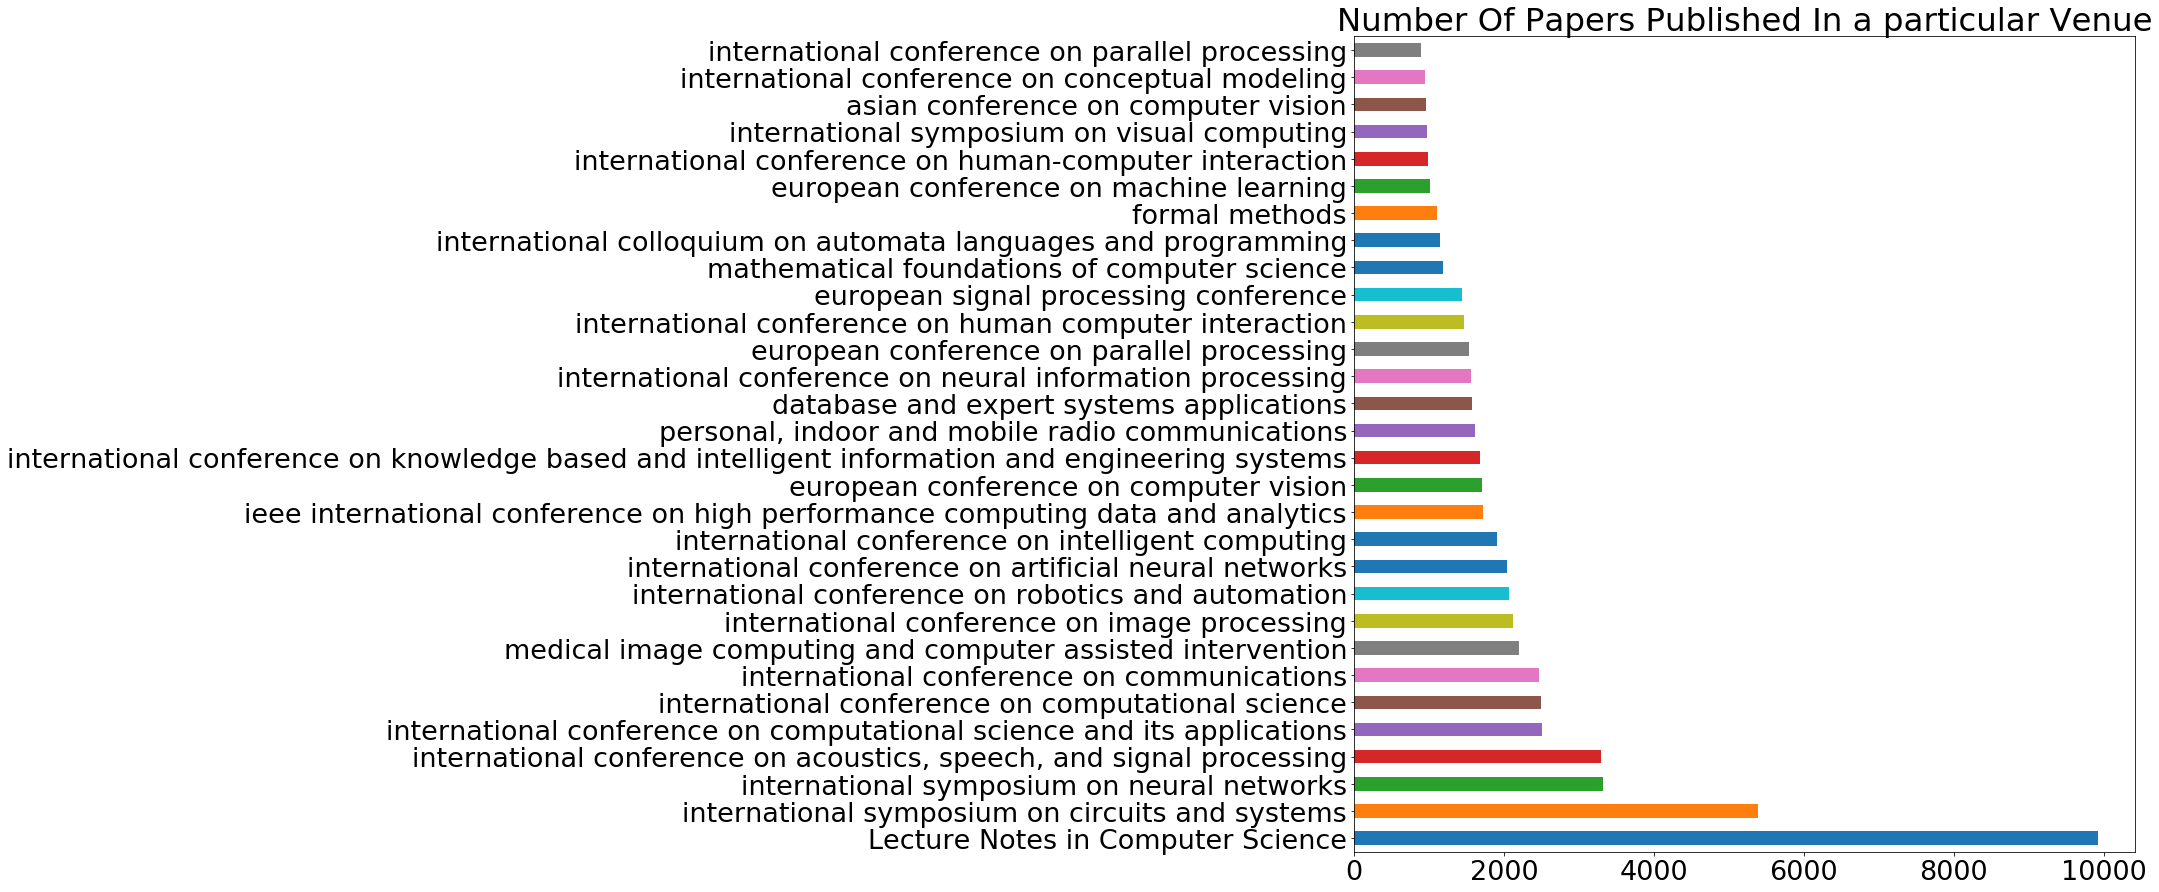

In [182]:
plt.figure(figsize=(14,15))
NumberOfPapersPublishedInVenue_or_FOS(1900,2019).plot(kind="barh",title="Number Of Papers Published In a particular Venue") #plot

####  where have the authors published its and when and author with most number of papers

In [77]:
cummulative_data["authors"].value_counts()[:20]

Bogusław Cyganek                                                                  15
John K. Debenham                                                                  12
Ryotaro Kamimura                                                                  12
Mahdi Jalili-Kharaajoo                                                             9
Joaquín Torres-Sospedra, Carlos Hernández-Espinosa, Mercedes Fernández-Redondo     9
Krzysztof Walkowiak                                                                8
Eun-Jun Yoon, Kee-Young Yoo                                                        8
Yoshitatsu Matsuda, Kazunori Yamaguchi                                             7
Osamu Ikeda                                                                        7
Antonio Robles-Kelly, Edwin R. Hancock                                             7
Ichiro Satoh                                                                       7
Manfred Broy                                                     

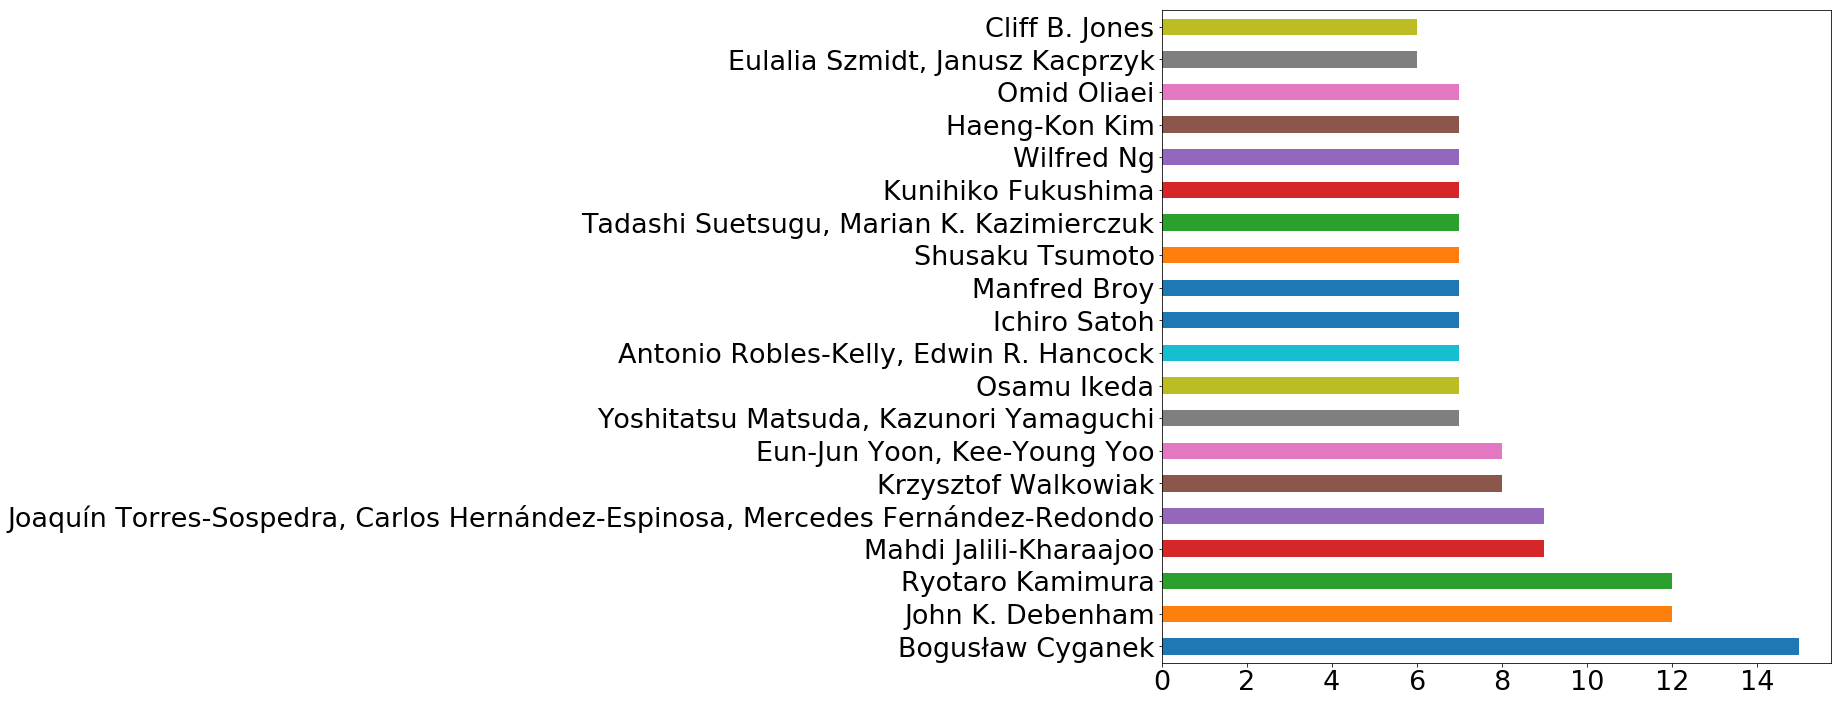

In [126]:
plt.figure(figsize=(12,12))
cummulative_data["authors"].value_counts()[:20].plot(kind="barh") #plot
## another way to do this
# data.groupby(by="authors").size().sort_values(ascending=False)

#### when the papers were published and in which venue by people who were most active

In [80]:
mask = np.in1d(cummulative_data["authors"],["John K. Debenham"]) # when the papers were published and in which venue by people who were most active
entries = cummulative_data.index[mask]
cummulative_data.iloc[entries]
## or in one line
# df = data.iloc[data.index[data["authors"] == "John K. Debenham"]]

,authors,fos,abstract,title,year,venue
15958,John K. Debenham,"Knowledge base, Database, Knowledge engineerin...",Knowledge engineering has developed fine tools...,A Lesson for Software Engineering from Knowled...,2003,database and expert systems applications
16464,John K. Debenham,"Business process, Business process discovery, ...",Industry processes are the trans-corporate bus...,A Multiagent Architecture Addresses the Comple...,2001,international conference on computational science
17786,John K. Debenham,"Data mining, Database, Knowledge base, Expert ...",The problem of maintaining a knowledge base is...,Knowledge Base Maintenance through Knowledge R...,2001,database and expert systems applications
18469,John K. Debenham,"Data mining, Relational database, Formalism (p...",Items are introduced as a universal formalism ...,Decomposition of Four Component Items,1993,database and expert systems applications
22192,John K. Debenham,"Knowledge extraction, Information system, Data...",Knowledge 'decay' is a measure of the degradat...,Knowledge Decay in a Normalised Knowledge Base,2000,database and expert systems applications
31096,John K. Debenham,"Management science, Game theory, Data mining, ...","Business relationships, and the sense of trust...",Foundations for automated trading — its the in...,2005,database and expert systems applications
39479,John K. Debenham,"Business process discovery, Business process, ...",Industry processes are the trans-corporate bus...,Agents for Industry Process Management,2002,database and expert systems applications
43232,John K. Debenham,"Data mining, Domain model, Conceptual model, K...",The problem of constructing the functional mod...,Constructing the Functional Model,1997,database and expert systems applications
44085,John K. Debenham,"Agent architecture, Autonomous agent, Maintain...","Intelligent agents should be autonomous, coope...","An Adaptive, Maintable, Extensible Process Agent",1999,database and expert systems applications
47677,John K. Debenham,"Information system, System of systems, Databas...",Traditional database technology includes rigor...,Knowledge Systems: A Synthesis of Database Sys...,1990,database and expert systems applications


#### Most papers published in a particular field of study

In [97]:
cummulative_data["fos"].value_counts()[:11]

Multimedia, Human–computer interaction, Computer science                                                       5
Mathematics, Mathematical analysis, Calculus                                                                   4
Data mining, Computer science                                                                                  3
Applied mathematics, Higher education, Computational science, Computer science                                 2
Machine learning, Pattern recognition, Artificial neural network, Artificial intelligence, Computer science    2
Human–computer interaction, Computer science                                                                   2
Computer vision, Artificial intelligence, Computer science                                                     2
Mathematical analysis, Mathematical physics, Mathematics                                                       2
Mathematical analysis, Calculus, Mathematics                                                    

In [114]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 27})

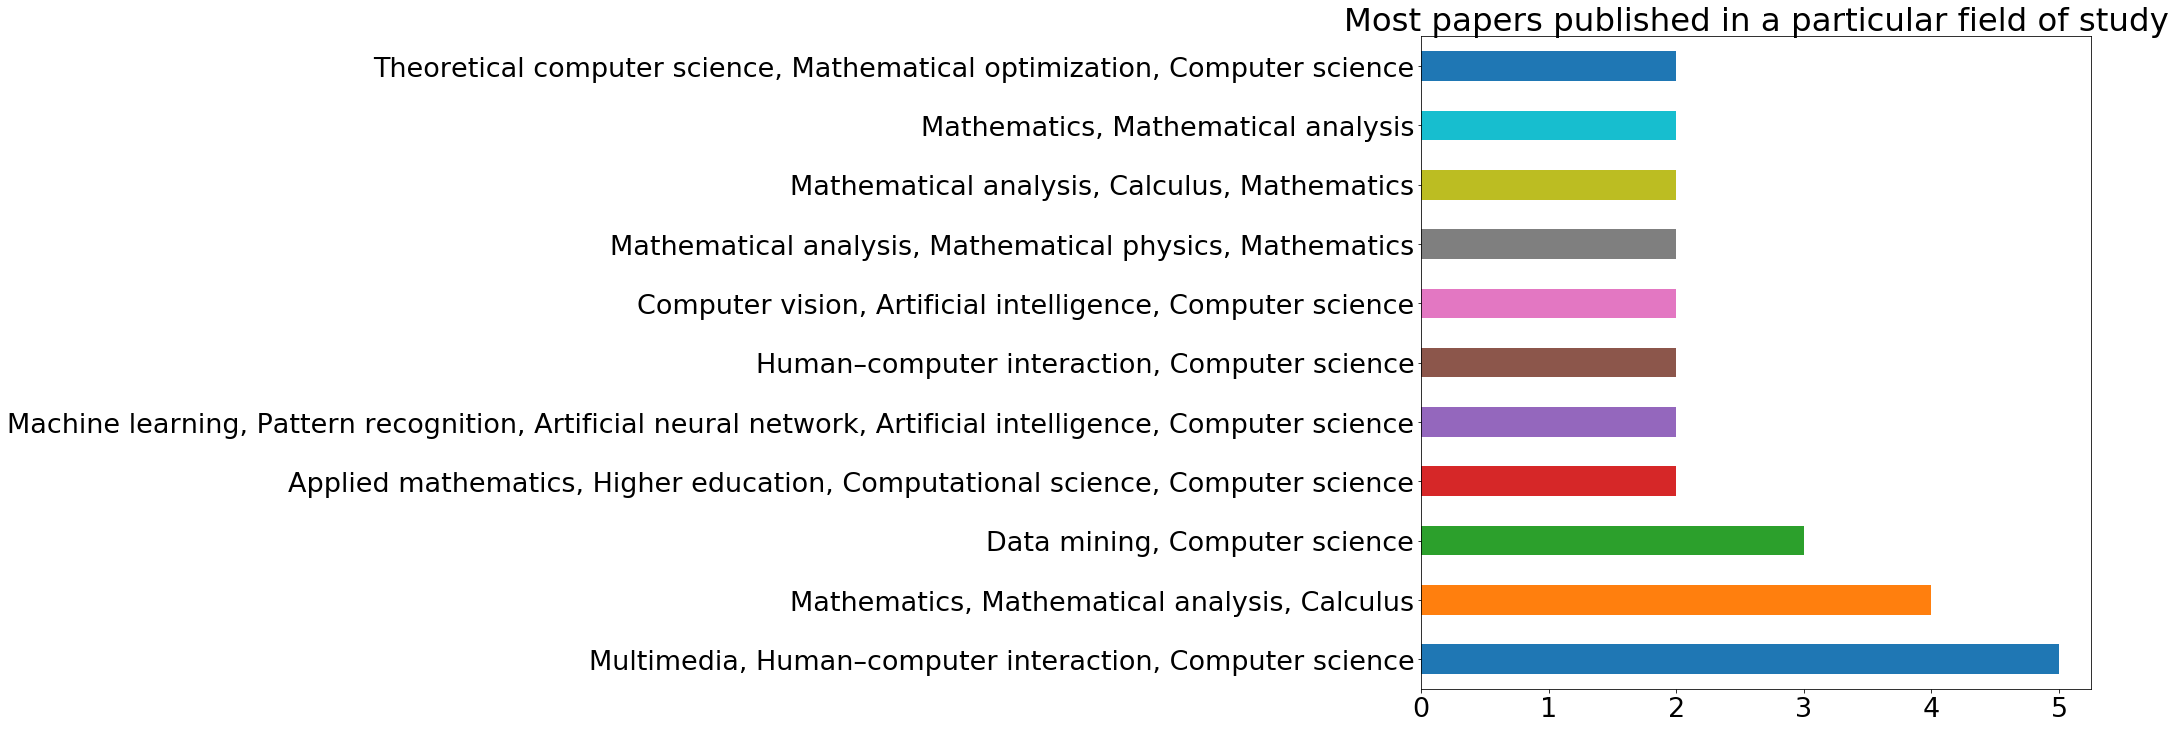

In [119]:
plt.figure(figsize=(12,12))
cummulative_data["fos"].value_counts()[:11].plot(kind="barh",title="Most papers published in a particular field of study")

#### The Paper published in the field of Philosophy, Performance art have which type of venues

In [128]:
philosophy = (cummulative_data["fos"] == "Multimedia, Human–computer interaction, Computer science")
philo = cummulative_data[philosophy]
philo["venue"].value_counts()[:5]

international conference on human-computer interaction                        3
international conference on universal access in human computer interaction    1
international conference on human computer interaction                        1
Name: venue, dtype: int64

## Data preperation - Feature Extraction

In [129]:
operational_Document = cummulative_data[["title","abstract","fos"]]
operational_Vocab = cummulative_data[["title","abstract"]]
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
REPLACE_BY_SPACE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS = re.compile('[^0-9a-z #+_]')
REMOVING_NUMBERS = re.compile("(^|\W)\d+")
STOPWORDS = set(stopwords.words('english'))

In [11]:
document_Content = [" ".join(entry) for entry in operational_Document.values.tolist()]
vocab_Content = [" ".join(entry) for entry in operational_Vocab.values.tolist()]

In [130]:
def Nltk2Word_And_Tag(nltk_tag):
    """
        Input text: a string
        
        return: string tag such as 'a','v','n','r'
    """
        
    if nltk_tag.startswith('J'):
        return wordnet.wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.wordnet.ADV
    else:        
        return None
    
def Lemmatize_Sentence(sentence):
    """
        Input text: a string
        
        return: lemmatized string
    """
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    w_n_tagged = map(lambda x: (x[0], Nltk2Word_And_Tag(x[1])), nltk_tagged)
    res_words = []
    for word, tag in w_n_tagged:
        if tag is None: 
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
    return " ".join(res_words)

def Stem_Sentence(sentence):
    """
        Input text: a string
        
        Description: Can be applied for varying the analysis of Classifier
        
        return: stemmed string
    """
    tokenize_words = nltk.word_tokenize(sentence)
    stem_sents = [stemmer.stem(word) for word in tokenize_word]
    return " ".join(stem_sents)

def Length_Words_Disapproved(sentence,length):
    """
        Input text: a string and int for defining the limit on the length of the words that will be allowed
        
        return: modified text string
    """
    tokenize_words = nltk.word_tokenize(sentence)
    sent = list(filter(lambda x: len(x) > length,tokenize_words))
    return " ".join(sent) 

def clean_text(text,flag):
    """
        Input text: a string and flag for stemming on the current text
        
        return: modified text string which is lower-cased
    """
    text = text.lower() # lowercase text
    text = REMOVING_NUMBERS.sub(" ", text) # removes the occurences of number such as 2019 or 3valued or 21
    text = REPLACE_BY_SPACE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text 
    if(flag):
        text = Stem_Sentence(text)
    
    return Lemmatize_Sentence(Length_Words_Disapproved(text,3))


In [131]:
lemmatized_abstract = cummulative_data["abstract"].apply(lambda x:clean_text(x,0))
lemmatized_title = cummulative_data["title"].apply(lambda x:clean_text(x,0))
lemmatized_fos = cummulative_data["fos"].apply(lambda x:clean_text(x,0))

# Analysis

### Building Vocabulary

In [160]:
vocab = nltk.word_tokenize(" ".join([" ".join(entry) for entry in np.column_stack((lemmatized_title,lemmatized_abstract)).tolist()]))
# Finding most common terms in context
fdist = FreqDist(vocab)
words = fdist.most_common(1600)
vocabulary_terms = []

for word_tuple in words:
    vocabulary_terms.append(word_tuple[0])


### Building Documents

In [133]:
document = [" ".join(entry) for entry in np.column_stack((lemmatized_title,lemmatized_abstract,lemmatized_fos)).tolist()]

### TF-IDF Vectorizer using Vocabulary and Document

In [161]:
vectorizer = TfidfVectorizer()
vectorizer = vectorizer.fit(vocabulary_terms)
mat = vectorizer.transform(document)

In [162]:
TFIDF = pd.DataFrame(mat.todense(),columns = vectorizer.get_feature_names())
TFIDF

,ability,able,abstract,abstraction,accelerate,access,accomplish,accord,account,accuracy,...,word,work,workflow,workload,world,would,write,year,yield,zero
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.09759,0.000000,0.097590,0.0,0.000000,0.000000,0.000000,0.00000
4,0.000000,0.107833,0.0,0.000000,0.0,0.000000,0.0,0.107833,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
7,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
8,0.000000,0.000000,0.0,0.000000,0.0,0.098058,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
9,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000


In [183]:
X_train.shape

(59847, 1600)

In [187]:
len(y_labels)

74809

### Feature Extraction using Train Test Split

In [185]:
y_labels = cummulative_data["venue"].tolist()
X_train, X_test, y_train, y_test = train_test_split(TFIDF, y_labels, test_size=0.20, random_state=30)

In [ ]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
print(clf.predict(X_test[1:10]))
clf.score(X_test,y_test)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
GaussianNB(priors=None, var_smoothing=1e-09)
print(clf.predict(list(np.arange(791).reshape(1,791))))
clf.score(X_test,y_test)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
# print(clf.feature_importances_)
print(clf.predict(list(np.arange(791).reshape(1,791))))
clf.score(X_test,y_test)

## Classifier Training and Evaluation

In [166]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)  
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
print(clf.coef_)


[[ 4.26767860e-02  2.69959994e-01 -1.14885125e-01 ...  1.18070846e-01
  -2.37444625e-02  4.57453131e-01]
 [ 2.03088375e-01  4.17698856e-02  2.16500821e+00 ...  3.08935242e-01
  -1.69407058e-01 -1.14227126e-04]
 [ 4.40245597e-01 -5.53150491e-01 -5.18303273e-01 ...  6.69440456e-02
   1.51820302e-02 -2.02477010e-01]
 ...
 [ 8.48801934e-02  2.60573076e-01 -3.49544031e-01 ... -8.64659842e-01
   1.02348908e-01 -2.76598357e-01]
 [-1.10100278e+00  2.68799454e-02 -2.16590810e-01 ... -3.39664836e-01
  -5.77086445e-01 -5.30135312e-01]
 [-1.40647933e-01  1.19471237e-01 -8.33884504e-01 ... -1.70480707e-01
  -9.25265534e-02 -3.68651582e-01]]


In [167]:
print(clf.intercept_)

[-1.5197543  -1.70146328 -1.08321487 -0.7363413  -1.88744358 -1.84706293
 -1.64872503 -1.93153284 -1.58904178 -1.3656521  -1.75087623 -1.99084534
 -1.21141582 -1.20065885 -0.75602488 -2.05672947 -1.36565151 -1.28918668
 -1.69814514 -1.1004215  -1.42408313 -1.17367886 -1.83948733 -0.95861376
 -1.21244076 -1.03329684 -1.49074389 -1.67390439 -1.40399411 -1.27561677
 -1.54144296 -1.40893192 -0.9066897  -1.17594943 -1.74014884 -0.89155036
 -1.27239751 -1.43931168 -1.76204952 -1.15038532 -2.23343009 -1.10707224
 -1.57361977 -1.45824646 -2.2299118  -1.66372761 -0.82704568 -2.10585502
 -1.56329595 -1.57132365]


In [170]:
cummulative_data.iloc[1600]

authors                        Sylvie Perreau, Pierre Duhamel
fos         Blind equalization, Mathematical optimization,...
abstract    This paper is concerned with the blind equalis...
title       On-line blind equalization of FIR channels usi...
year                                                     1997
venue       international conference on acoustics, speech,...
Name: 1600, dtype: object

In [175]:
print(clf.predict(X_test))

['international conference on acoustics, speech, and signal processing'
 'international conference on computational science'
 'database and expert systems applications' ...
 'international conference on conceptual modeling'
 'international symposium on circuits and systems'
 'international symposium on neural networks']


In [176]:
clf.score(X_test,y_test)

0.4717952145435102

### MultinomialNaiveBayes Classifer 

In [164]:
classifier_mul = MultinomialNB().fit(X_train,y_train)
classifier_mul.score(X_test,y_test)

0.38444058280978477

### Decision Tree Classifier

In [165]:
classifier_dt = DecisionTreeClassifier().fit(X_train,y_train)
classifier_dt.score(X_test,y_test)

0.3213474134474001

### Using Cross Validation KFold and RepeatedKFold

In [144]:
classifier_Multinomial = MultinomialNB()
classifier_LogisticRegression = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
classifier_RandomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
classifier_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)

kf = KFold(n_splits=10)
random_state = 300
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=random_state)

scoring = ['precision_macro', 'recall_macro','accuracy','f1_macro']
scores = cross_validate(classifier_Multinomial, TFIDF, y_labels, cv=rkf,scoring=scoring)


ValueError: Found input variables with inconsistent numbers of samples: [59847, 74809]

### Accuracy, Precision, Recall and F1_Score

In [92]:
print("Accuracy : ",np.average(scores['test_accuracy']))
print("Precision : ",np.average(scores['test_precision_macro']))
print("Recall : ",np.average(scores['test_recall_macro']))
print("F1_macro : ",np.average(scores['test_f1_macro']))

Accuracy :  0.8092919537401576
Precision :  0.8107667287161611
Recall :  0.8083990194991679
F1_macro :  0.8076070736175952
